In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [522]:
diabetes_df=pd.read_csv("/content/drive/MyDrive/GTC_Internship/diabetes/diabetes - diabetes.csv")

In [523]:
pd.set_option('display.max_columns', None)

# Phase 1: EDA

## Explore Data

In [524]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [525]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [526]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [527]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [528]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [529]:
diabetes_df.shape

(768, 9)

- zero values here not realistic it may be null fix
- our data is so small delete them will be a high risk
- let's try to fix them

## Zero dealing

In [530]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [531]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Glucose Column

In [532]:
#Gulcose Column
diabetes_df.loc[diabetes_df['Glucose']==0,'Age']

,Age
75,22
182,21
342,22
349,37
502,41


In [533]:
diabetes_df[diabetes_df['Glucose']==0].sort_values('Age')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
182,1,0,74,20,23,27.7,0.299,21,0
75,1,0,48,20,0,24.7,0.140,22,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [534]:
diabetes_df[
    diabetes_df['Age'].isin([21,22,37,41])
    ].groupby(['Outcome','Age'])['Glucose'].median().reset_index()

,Outcome,Age,Glucose
0,0,21,102.0
1,0,22,98.0
2,0,37,133.0
3,0,41,94.0
4,1,21,138.0
5,1,22,142.0
6,1,37,133.5
7,1,41,178.0


In [535]:
diabetes_df.loc[(diabetes_df['Outcome']==0) &
                (diabetes_df['Age']==21)&
                 (diabetes_df['Glucose']==0),'Glucose']=102

diabetes_df.loc[(diabetes_df['Outcome']==0) &
                (diabetes_df['Age']==22)&
                 (diabetes_df['Glucose']==0),'Glucose']=98

diabetes_df.loc[(diabetes_df['Outcome']==1) &
                (diabetes_df['Age']==37)&
                 (diabetes_df['Glucose']==0),'Glucose']=133

diabetes_df.loc[(diabetes_df['Outcome']==1) &
                (diabetes_df['Age']==41)&
                 (diabetes_df['Glucose']==0),'Glucose']=178



In [536]:
diabetes_df[diabetes_df['Glucose']==0].sort_values('Age')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### BloodPressure Column

In [537]:
#BloodPressure
BloodPressure_ages=list(diabetes_df.loc[diabetes_df['BloodPressure']==0,'Age'])
len(BloodPressure_ages)

35

In [538]:
blood_pressure_zero_df=diabetes_df[
    diabetes_df['Age'].isin(BloodPressure_ages)
    ].groupby(['Outcome','Age'])['BloodPressure'].median().reset_index()

In [539]:
blood_pressure_zero_df

,Outcome,Age,BloodPressure
0,0,21,64.0
1,0,22,64.0
2,0,23,64.0
3,0,24,67.0
4,0,25,62.0
5,0,26,68.0
6,0,27,73.0
7,0,28,72.0
8,0,29,75.5
9,0,30,74.0


In [540]:
for index , row in blood_pressure_zero_df.iterrows():
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &
                (diabetes_df['Age']==row['Age'])&
                 (diabetes_df['BloodPressure']==0),
                  'BloodPressure']=row['BloodPressure']

/tmp/ipython-input-1777949055.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &


In [541]:
diabetes_df.loc[diabetes_df['BloodPressure']==0,'Age'].shape

(1,)

In [542]:
diabetes_df.shape

(768, 9)

In [543]:
diabetes_df=diabetes_df[~((diabetes_df['Age']==72)&(diabetes_df['BloodPressure']==0))]

In [544]:
diabetes_df.shape

(767, 9)

In [545]:
diabetes_df.loc[diabetes_df['BloodPressure']==0,'Age']

,Age


### SkinThickness	Column


In [546]:
#SkinThickness
SkinThickness_ages=list(diabetes_df.loc[diabetes_df['SkinThickness']==0,'Age'])
len(SkinThickness_ages)

226

In [547]:
SkinThickness_zero_df=diabetes_df[
    diabetes_df['Age'].isin(SkinThickness_ages)
    ].groupby(['Outcome','Age'])['SkinThickness'].median().reset_index()

In [548]:
SkinThickness_zero_df

,Outcome,Age,SkinThickness
0,0,21,19.0
1,0,22,21.0
2,0,23,25.0
3,0,24,27.5
4,0,25,23.0
...,...,...,...
86,1,60,18.0
87,1,61,0.0
88,1,62,49.5
89,1,66,0.0


In [549]:
for index , row in SkinThickness_zero_df.iterrows():
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &
                (diabetes_df['Age']==row['Age'])&
                 (diabetes_df['SkinThickness']==0),
                  'SkinThickness']=row['SkinThickness']

/tmp/ipython-input-3735901613.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &


In [550]:
diabetes_df.loc[diabetes_df['SkinThickness']==0,'Age'].shape

(42,)

In [551]:
new_SkinThickness_ages=list(diabetes_df.loc[diabetes_df['SkinThickness']==0,'Age'])
temp_df=diabetes_df[
    diabetes_df['Age'].isin(new_SkinThickness_ages)].groupby(['Age'])['SkinThickness'].median().reset_index()


In [552]:
for index , row in temp_df.iterrows():
  diabetes_df.loc[
                (diabetes_df['Age']==row['Age'])&
                 (diabetes_df['SkinThickness']==0),
                  'SkinThickness']=row['SkinThickness']

In [553]:
diabetes_df.loc[diabetes_df['SkinThickness']==0,'Age'].shape

(22,)

- Is SkinThickness column is very important column to drop 22 row?


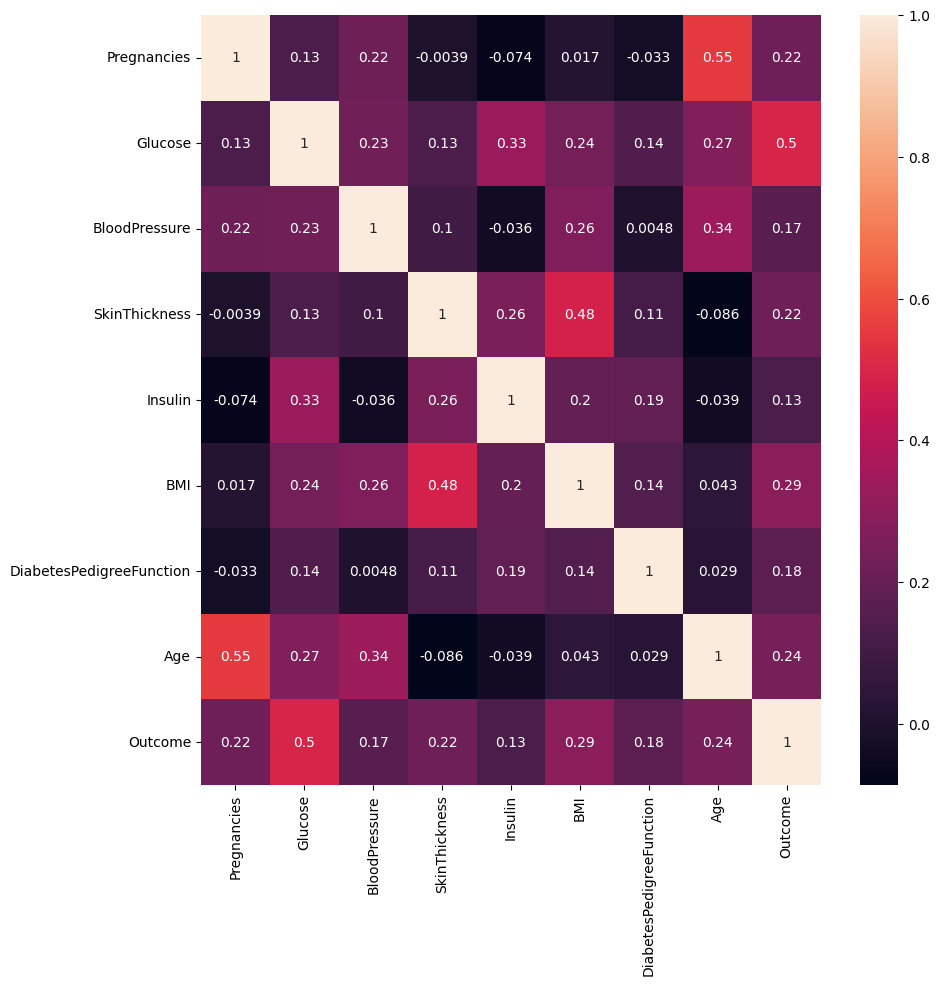

In [554]:
corr=diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

- according to correlation it has high colinearity but 22 row is a very high risk to drop them because :
  - first we still extract information
  - second we have a small DataFrame so I should be careful
- So, My decision is to leave these zero values now untill extract onther info

#### After finish other column

In [555]:
new_SkinThickness_ages_2=list(diabetes_df.loc[diabetes_df['SkinThickness']==0,'Age'])
len(new_SkinThickness_ages_2)

22

In [556]:
new_SkinTThickness_df=diabetes_df[
    diabetes_df['Age'].isin(new_SkinThickness_ages_2)
    ].groupby(['Outcome','Age','Pregnancies'])['SkinThickness'].median().reset_index()

In [557]:
new_SkinTThickness_df=new_SkinTThickness_df[new_SkinTThickness_df['SkinThickness']!=0]
new_SkinTThickness_df.shape

(5, 4)

In [558]:
for index , row in new_SkinTThickness_df.iterrows():
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &
                (diabetes_df['Age']==row['Age'])&
                (diabetes_df['Pregnancies']==row['Pregnancies'])&
                 (diabetes_df['SkinThickness']==0),
                  'SkinThickness']=row['SkinThickness']

In [559]:
diabetes_df[diabetes_df['SkinThickness']==0].shape

(20, 9)

In [560]:
diabetes_df[diabetes_df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,80.0,0.0,0,27.1,1.441,57,0
58,0,146,82.0,0.0,0,40.5,1.781,44,0
123,5,132,80.0,0.0,0,26.8,0.186,69,0
221,2,158,90.0,0.0,0,31.6,0.805,66,1
278,5,114,74.0,0.0,0,24.9,0.744,57,0
294,0,161,50.0,0.0,0,21.9,0.254,65,0
333,12,106,80.0,0.0,0,23.6,0.137,44,0
336,0,117,80.0,0.0,0,33.8,0.932,44,0
337,5,115,76.0,0.0,0,31.2,0.343,44,1
344,8,95,72.0,0.0,0,36.8,0.485,57,0


- I will try to keep them as user miss to enter it and try to delete them to compare the accuracy

In [561]:
# diabetes_df.shape

In [562]:
# diabetes_df=diabetes_df.loc[~(diabetes_df['SkinThickness']==0)]

In [563]:
# diabetes_df.shape

- keep them get better accuracy

### Insulin Column

In [564]:
#Insulin
Insulin_ages=list(diabetes_df.loc[diabetes_df['Insulin']==0,'Age'])
len(Insulin_ages)

373

In [565]:
Insulin_zero_df=diabetes_df[
    diabetes_df['Age'].isin(Insulin_ages)
    ].groupby(['Outcome','Age'])['Insulin'].median().reset_index()

In [566]:
Insulin_zero_df

,Outcome,Age,Insulin
0,0,21,42.5
1,0,22,53.0
2,0,23,95.0
3,0,24,61.0
4,0,25,54.0
...,...,...,...
89,1,61,0.0
90,1,62,0.0
91,1,66,0.0
92,1,67,0.0


In [567]:
for index , row in Insulin_zero_df.iterrows():
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &
                (diabetes_df['Age']==row['Age'])&
                 (diabetes_df['Insulin']==0),
                  'Insulin']=row['Insulin']

/tmp/ipython-input-4230814470.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '42.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &


In [568]:
diabetes_df.loc[diabetes_df['Insulin']==0,'Age'].shape

(204,)

In [569]:
Insulin_ages_new=list(diabetes_df.loc[diabetes_df['Insulin']==0,'Age'])
Insulin_zero_df_new=diabetes_df[diabetes_df['Age'].isin(Insulin_ages_new)].groupby(['Age'])['Insulin'].median().reset_index()
Insulin_zero_df_new.head()

,Age,Insulin
0,21,42.5
1,22,53.0
2,23,95.0
3,27,0.0
4,29,105.0


In [570]:
for index , row in Insulin_zero_df_new.iterrows():
  diabetes_df.loc[
                (diabetes_df['Age']==row['Age'])&
                 (diabetes_df['Insulin']==0),
                  'Insulin']=row['Insulin']

In [571]:
diabetes_df.loc[diabetes_df['Insulin']==0,'Age'].shape

(138,)

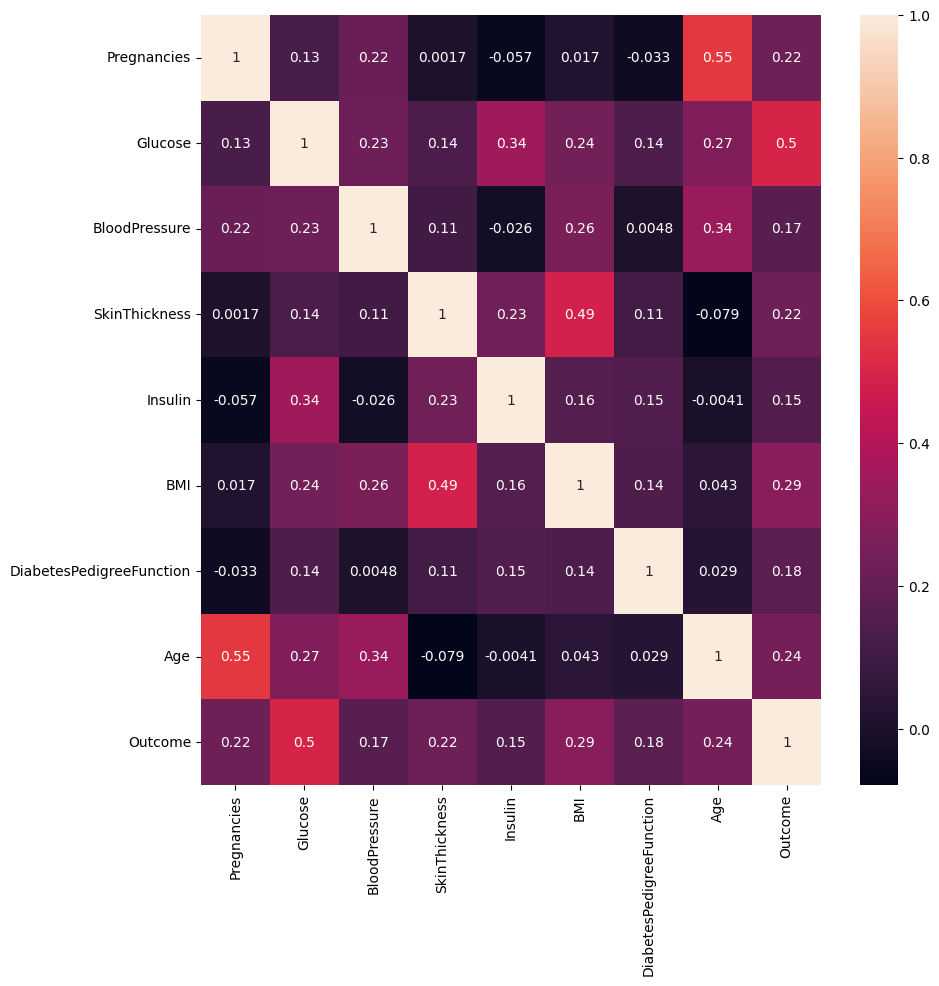

In [572]:
corr=diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [573]:
new_Insulin_ages_2=list(diabetes_df.loc[diabetes_df['Insulin']==0,'Age'])
len(new_Insulin_ages_2)

138

In [574]:
new_Insulin_df_preg=diabetes_df[
    diabetes_df['Age'].isin(new_Insulin_ages_2)
    ].groupby(['Outcome','Age','Pregnancies'])['Insulin'].median().reset_index()

In [575]:
new_Insulin_df_preg.shape

(137, 4)

In [576]:
new_Insulin_df_preg=new_Insulin_df_preg[new_Insulin_df_preg['Insulin']!=0]
new_Insulin_df_preg.shape

(43, 4)

In [577]:
for index , row in new_Insulin_df_preg.iterrows():
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &
                (diabetes_df['Age']==row['Age'])&
                (diabetes_df['Pregnancies']==row['Pregnancies'])&
                 (diabetes_df['Insulin']==0),
                  'Insulin']=row['Insulin']

In [578]:
diabetes_df[diabetes_df['Insulin']==0].shape

(122, 9)

- same decision leave it and try

In [579]:
# diabetes_df.shape

In [580]:
# diabetes_df=diabetes_df.loc[~(diabetes_df['Insulin']==0)]

In [581]:
# diabetes_df.shape

- keep them get better accuracy

### BMI Column

In [582]:
BMI_ages=list(diabetes_df.loc[diabetes_df['BMI']==0,'Age'])
len(BMI_ages)
# BMI_ages

11

In [583]:
BMI_zero_df=diabetes_df[
    diabetes_df['Age'].isin(BMI_ages)
    ].groupby(['Outcome','Age'])['BMI'].median().reset_index()

In [584]:
for index , row in BMI_zero_df.iterrows():
  diabetes_df.loc[(diabetes_df['Outcome']==row['Outcome']) &
                (diabetes_df['Age']==row['Age'])&
                 (diabetes_df['BMI']==0),
                  'BMI']=row['BMI']

In [585]:
diabetes_df.loc[diabetes_df['BMI']==0,'Age'].shape

(0,)

##Visulization

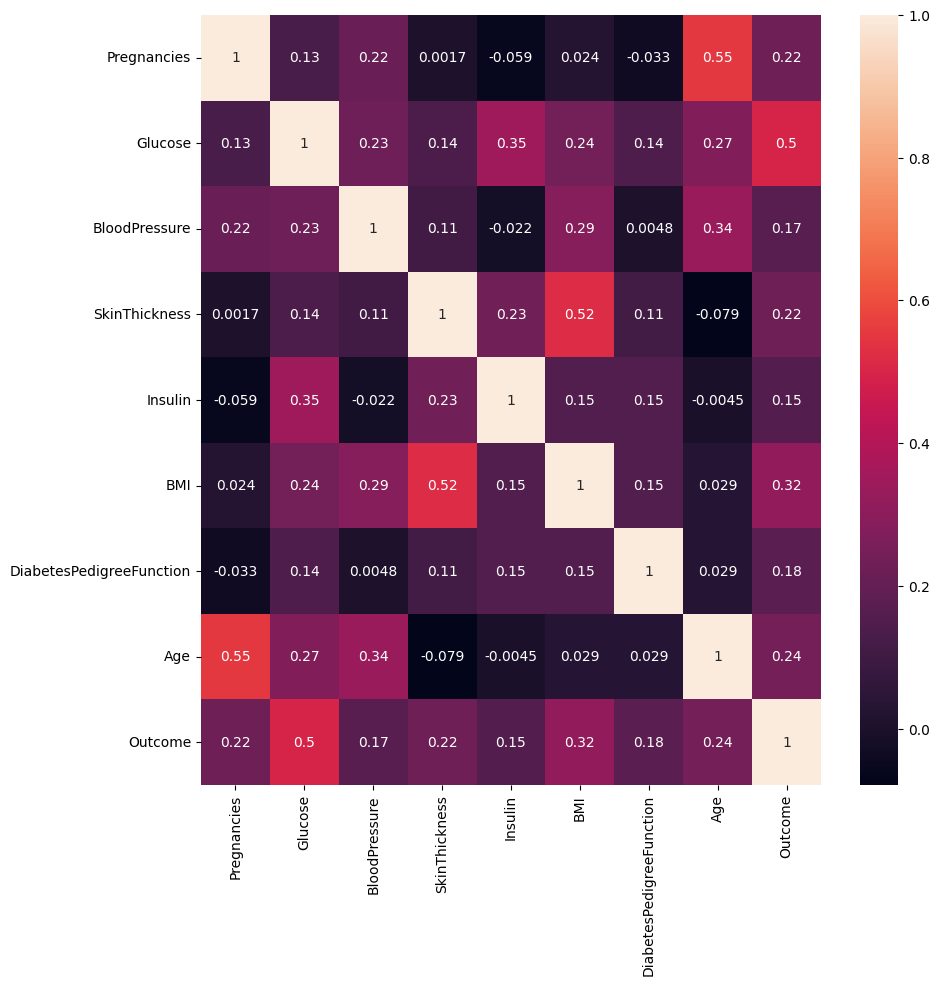

In [586]:
plt.figure(figsize=(10,10))
corr=diabetes_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

- How many patients with diabetes ?

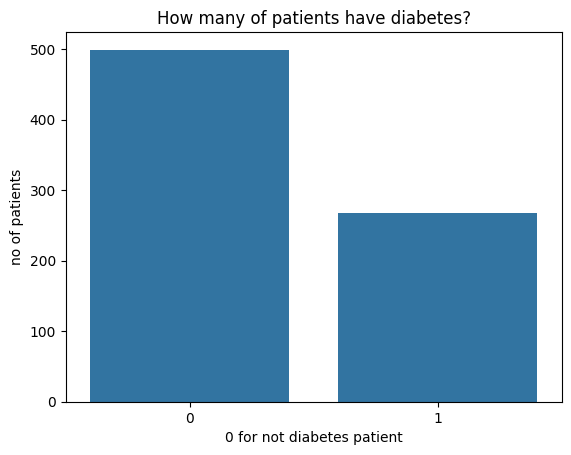

In [587]:
plt.figure()
sns.countplot(data=diabetes_df,x='Outcome')
plt.title("How many of patients have diabetes?")
plt.xlabel("0 for not diabetes patient")
plt.ylabel("no of patients")
plt.show()

- The relation between clucose level and outcome

In [588]:
np.mean(diabetes_df[diabetes_df['Outcome']==1]['Glucose'])

np.float64(142.4179104477612)

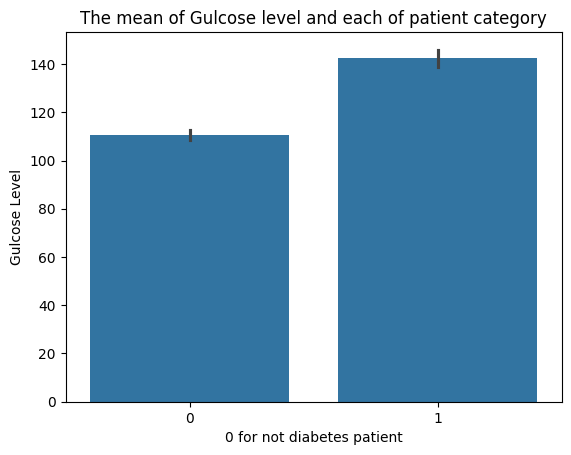

In [589]:
plt.figure()
sns.barplot(data=diabetes_df,x=pd.Categorical(diabetes_df['Outcome']),y='Glucose')
plt.title("The mean of Gulcose level and each of patient category")
plt.xlabel("0 for not diabetes patient")
plt.ylabel("Gulcose Level")
plt.show()

- is number of pregnancies affect glucose levels?

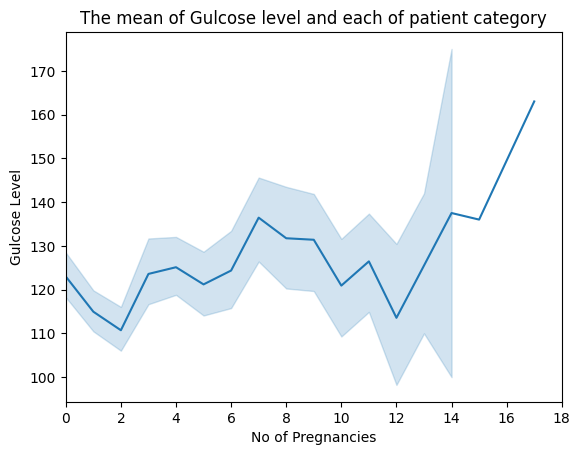

In [590]:
plt.figure()
sns.lineplot(data=diabetes_df,x='Pregnancies',y='Glucose')
plt.xlim(0,18)
plt.title("The mean of Gulcose level and each of patient category")
plt.xlabel("No of Pregnancies")
plt.ylabel("Gulcose Level")
plt.show()

- what about women with diabetes

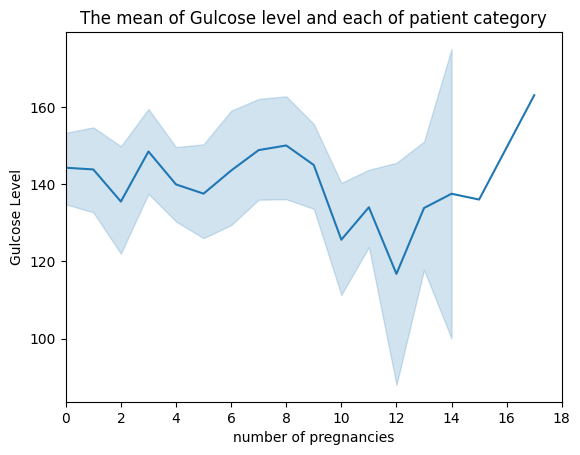

In [591]:
plt.figure()
women_with_diabetes=diabetes_df[diabetes_df['Outcome']==1]
sns.lineplot(data=women_with_diabetes,x='Pregnancies',y='Glucose')
plt.xlim(0,18)
plt.title("The mean of Gulcose level and each of patient category")
plt.xlabel("number of pregnancies")
plt.ylabel("Gulcose Level")
plt.show()

- most women with higher pregnancy number get higher glucose level especially between 6 to 11 and more than 16

- is a familly history of diabetes affect glucose level for who's have diabetes or not?

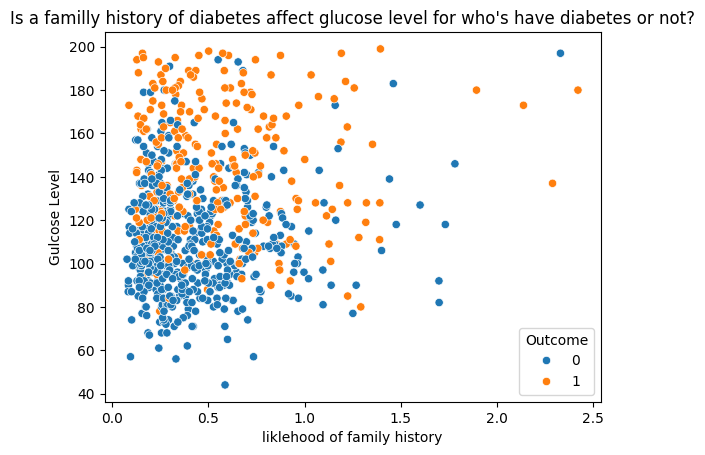

In [592]:
plt.figure()
sns.scatterplot(data=diabetes_df,x='DiabetesPedigreeFunction',y='Glucose',hue='Outcome')
plt.title("Is a familly history of diabetes affect glucose level for who's have diabetes or not?")
plt.xlabel("liklehood of family history")
plt.ylabel("Gulcose Level")
plt.show()

- most of people diagnosed with diabetes with low liklehood of family history but in higher liklehood most of them diagnosed with
- that's mean people behaviour's has a higher effect of disease more than family history.

- The relation between clucose levels and insluin

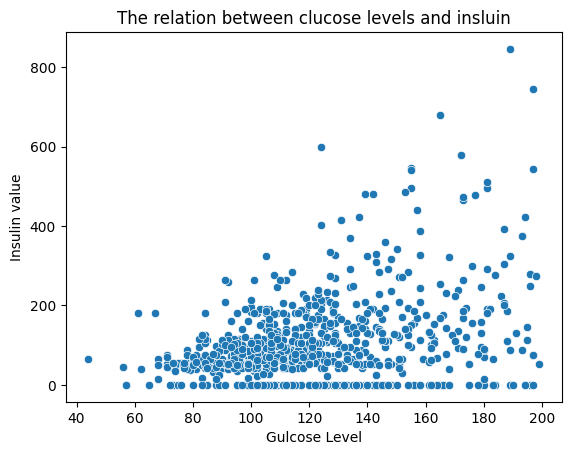

In [593]:
plt.figure()
sns.scatterplot(data=diabetes_df,x='Glucose',y='Insulin')
plt.title("The relation between clucose levels and insluin")
plt.xlabel("Gulcose Level")
plt.ylabel("Insulin value")
plt.show()

- This zero value not normal may come from people who do not enter this value

- So, we conculde more Gulcose mean more insulin

- what is the average age for people with and without diabetes

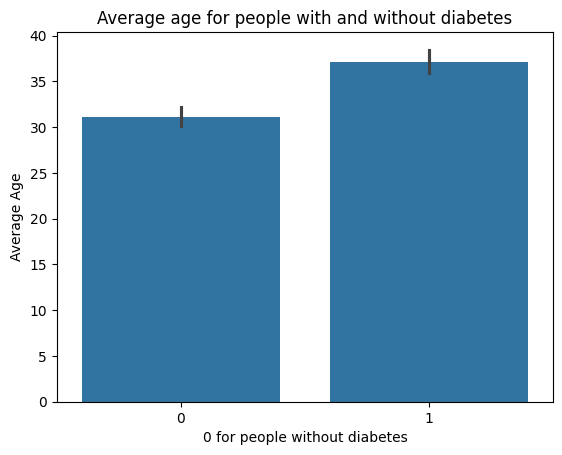

In [594]:
plt.figure()
sns.barplot(data=diabetes_df,x='Outcome',y='Age')
plt.title("Average age for people with and without diabetes")
plt.xlabel("0 for people without diabetes")
plt.ylabel("Average Age")
plt.show()

- is higher age always mean higher blood pressuer and higher glucose level?

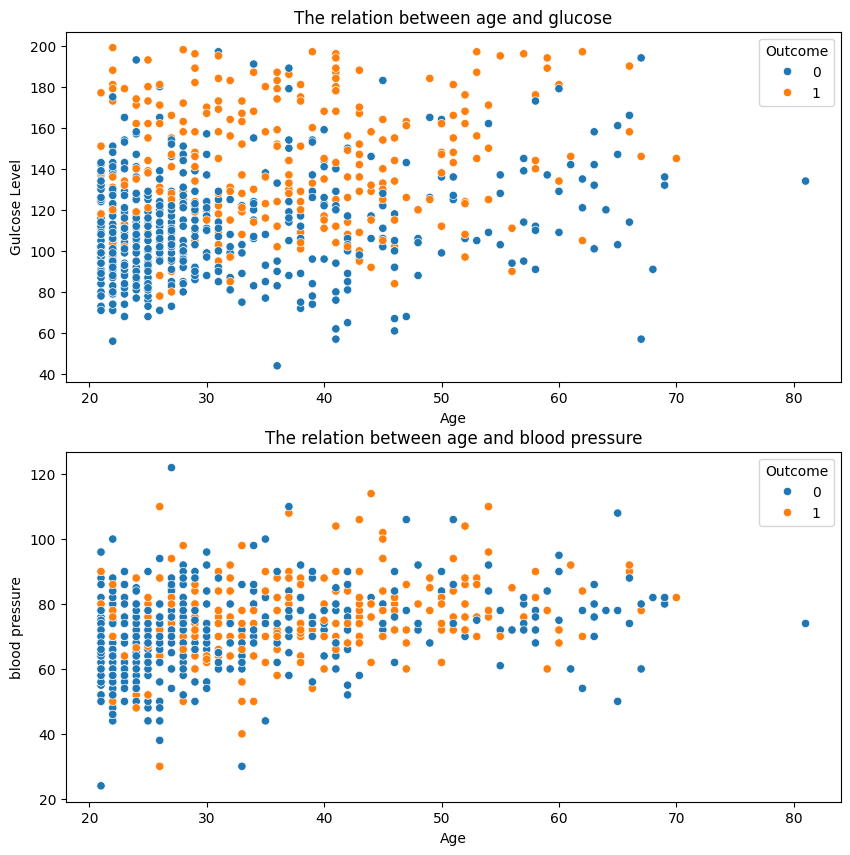

In [595]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.scatterplot(data=diabetes_df,x='Age',y='Glucose',hue='Outcome')
plt.title("The relation between age and glucose")
plt.xlabel("Age")
plt.ylabel("Gulcose Level")
# plt.show()
plt.subplot(2,1,2)
sns.scatterplot(data=diabetes_df,x='Age',y='BloodPressure',hue="Outcome")
plt.title("The relation between age and blood pressure")
plt.xlabel("Age")
plt.ylabel("blood pressure")
plt.show()



- In glucose level it increased and affect diabetes even in small ages with high percentage than blood pressure
- Both of them get higher value in older ages

- there is a dirrect relation between blood pressure and glucose levels?

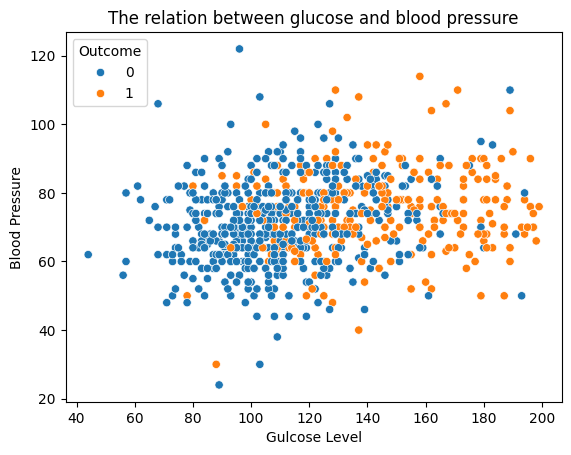

In [596]:
plt.figure()
sns.scatterplot(data=diabetes_df,x='Glucose',y='BloodPressure',hue='Outcome')
plt.title("The relation between glucose and blood pressure")
plt.xlabel("Gulcose Level")
plt.ylabel("Blood Pressure")
plt.show()

- small number of peopls have a high glucose with high blood pressure

- average of BMI and diabetes diagnose

Text(0, 0.5, 'BMI Level')

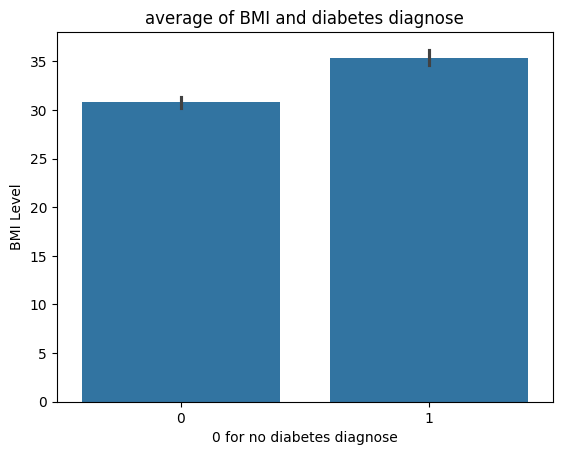

In [597]:
plt.figure()
sns.barplot(data=diabetes_df,x='Outcome',y='BMI')
plt.title("average of BMI and diabetes diagnose")
plt.xlabel("0 for no diabetes diagnose")
plt.ylabel("BMI Level")

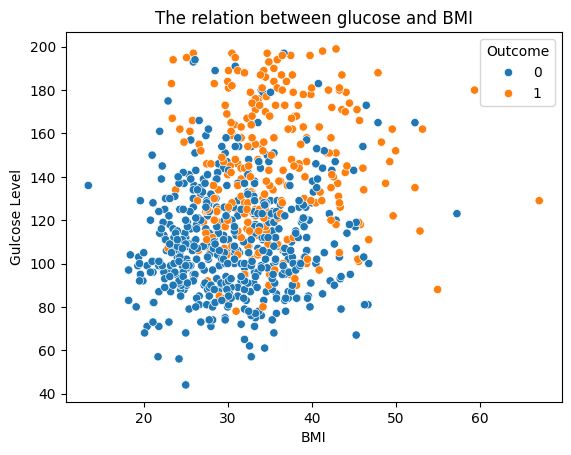

In [598]:
plt.figure
sns.scatterplot(data=diabetes_df,x='BMI',y='Glucose',hue='Outcome')
plt.title("The relation between glucose and BMI")
plt.xlabel("BMI")
plt.ylabel("Gulcose Level")
plt.show()

- higher BMI mean higher glucose levels

- See data distribution

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

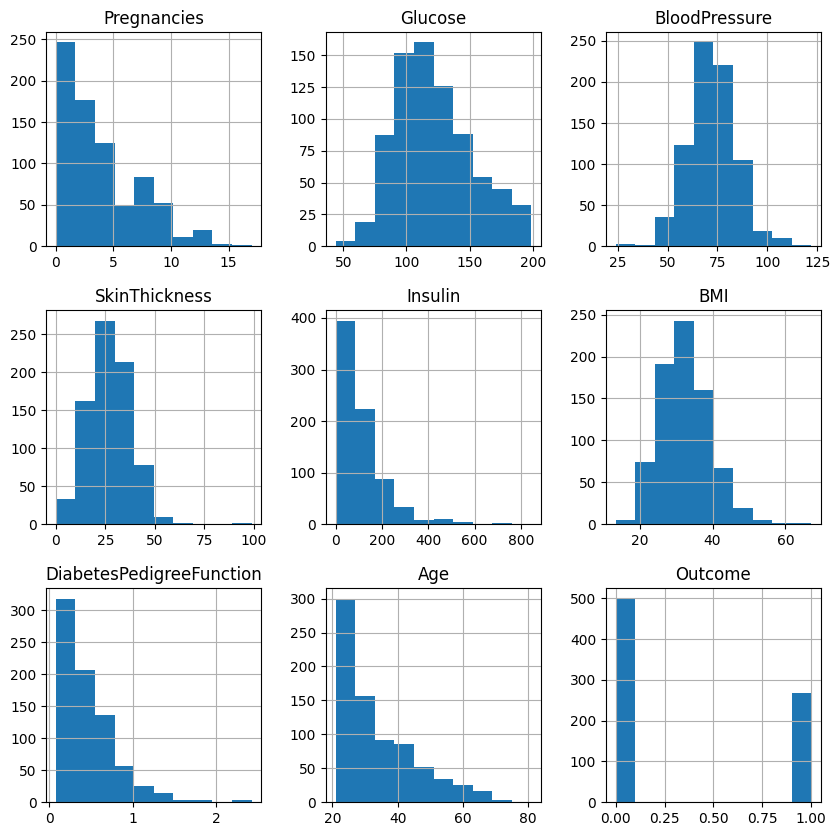

In [599]:
diabetes_df.hist(figsize=(10,10))

- insulin - DiabetesPedigreeFunction - Age has right skew so I will get the log tbe in normal distribution

In [600]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [601]:
diabetes_df['Age']=np.log(diabetes_df['Age']+1)
diabetes_df['DiabetesPedigreeFunction']=np.log(diabetes_df['DiabetesPedigreeFunction']+1)
diabetes_df['Insulin']=np.log(diabetes_df['Insulin']+1)
# diabetes_df['Pregnancies']=np.log(diabetes_df['Pregnancies']+1)
diabetes_df['SkinThickness']=np.log(diabetes_df['SkinThickness']+1)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

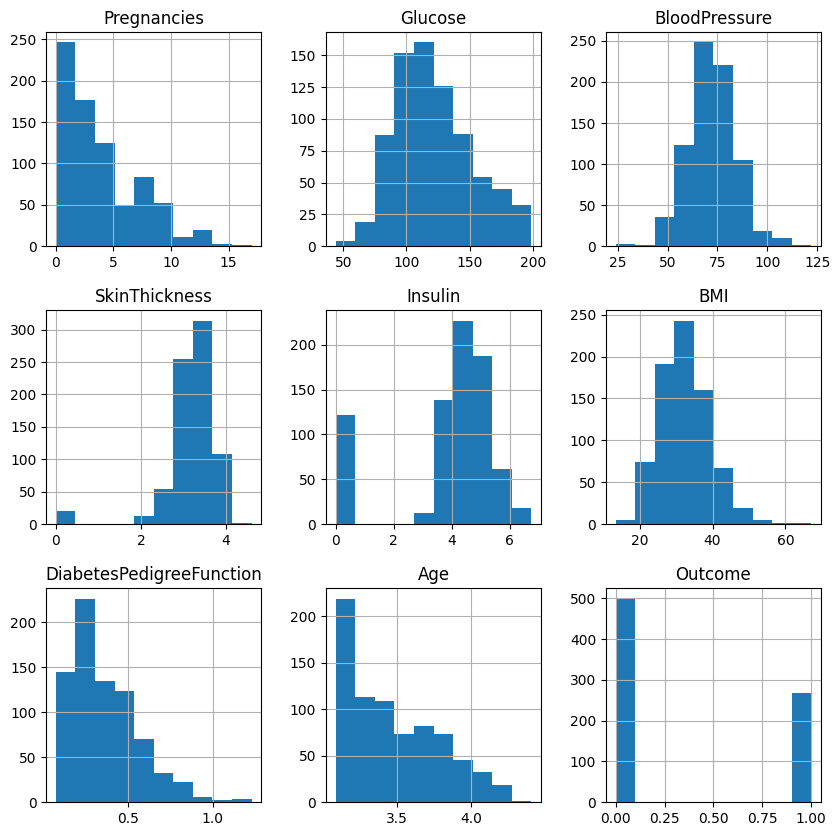

In [602]:
diabetes_df.hist(figsize=(10,10))

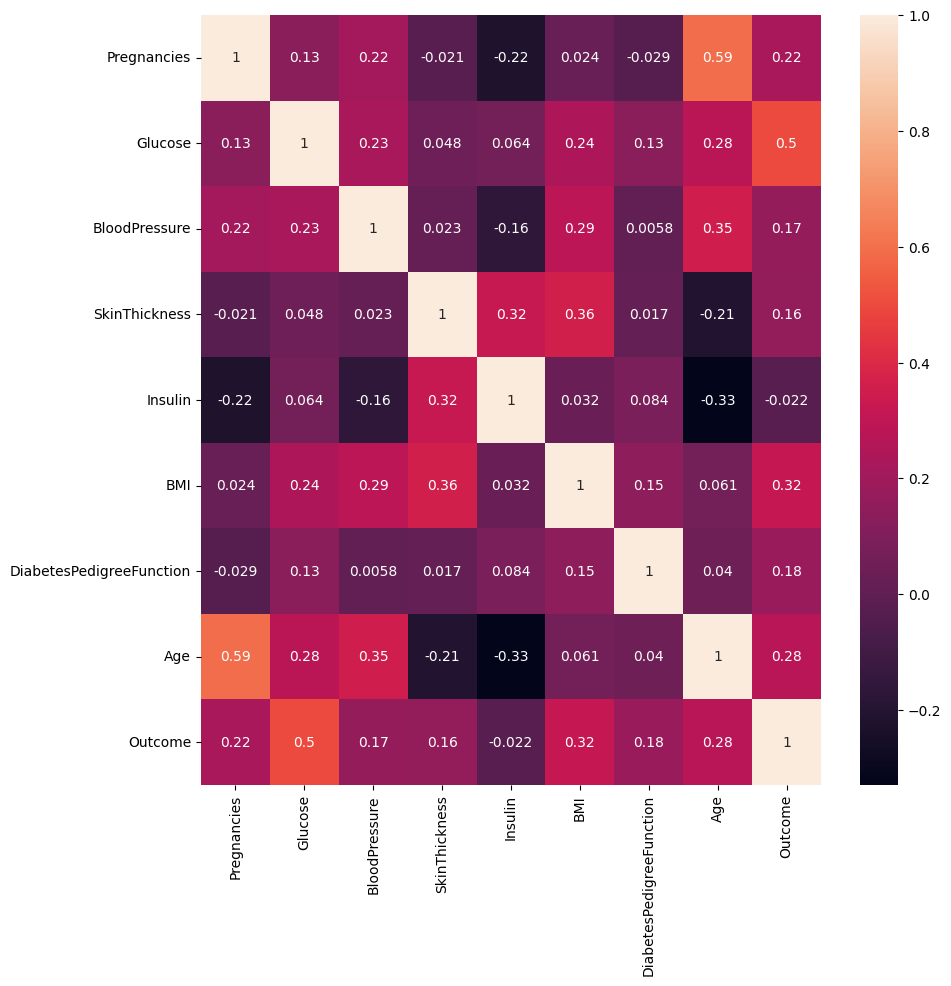

In [603]:
corr=diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

- blood pressure column and skinthickness column still with very low correlation so I will drop them

#Phase 2 : Prepare Data

In [604]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.9 KB


In [605]:
y=diabetes_df['Outcome']
x=diabetes_df.drop(columns=['Outcome'])

In [606]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 53.9 KB


In [607]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [608]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Phase 3 Model

## SVM

In [609]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('classifier',SVC(kernel='rbf'))
    ]
)

In [610]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'classifier__C':[0.1,1,10,100],
    'classifier__gamma':[0.01,0.1,1,10]
}
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=2
)

In [611]:
grid_search.fit(x_train,y_train)
print(f"Best Param: {grid_search.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END .............classifier__C=0.1, classifier__gamma=1; total time=   0.0s
[CV] END .............classifier__C=0.1, classif

In [612]:
best_perdiction_svm=grid_search.predict(x_test)

In [613]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,best_perdiction_svm)

0.7857142857142857

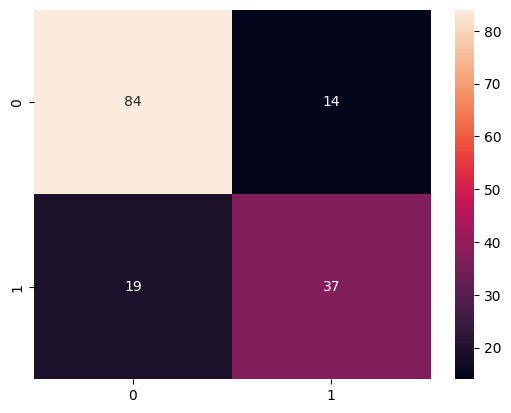

In [614]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_perdiction_svm)
sns.heatmap(cm,annot=True)
plt.show()

## Logistic Regression

In [615]:
from sklearn.linear_model import LogisticRegression
logreg=Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('classifier',LogisticRegression(max_iter=100))
]
)
logreg.fit(x_train,y_train)
y_predict_log=logreg.predict(x_test)
accuracy_score(y_test,y_predict_log)

0.7662337662337663

## KNN

In [616]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
knn=Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('classifier',KNeighborsClassifier())
])
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski'],
    'classifier__p': [1, 2]
    }
grid_search_knn=GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    verbose=2
)
grid_search_knn.fit(x_train,y_train)
print(f"Best Param: {grid_search_knn.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=distance; total time=   0.0s
[CV] END classifier

In [617]:
y_predict_knn=grid_search_knn.predict(x_test)
accuracy_score(y_test,y_predict_knn)

0.7922077922077922

In [618]:
from sklearn.metrics import classification_report

In [619]:
print("="*50,"SMV",'='*50)
print(classification_report(y_test,best_perdiction_svm))
print("="*50,"Logistic Regression",'='*50)
print(classification_report(y_test,y_predict_log))
print("="*50,"KNN",'='*50)
print(classification_report(y_test,y_predict_knn))

================================================== SMV ==================================================
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.73      0.66      0.69        56

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

================================================== Logistic Regression ==================================================
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        98
           1       0.69      0.66      0.67        56

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.76      0.77      0.77       154

================================================== KNN ==================================================
            

#Phase 4

- I will choose KNN because it has a higher percision than SVM
- Patient with FP (patients actually has diabetes and not diagnosed by model ) are more costly so percision is more important here than sensitivity

In [621]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [622]:
class user:
  def __init__(self):
    self.__Pregnancies=0
    self.__Glucose=0
    self.__Insulin=0
    self.__BMI=0
    self.__DiabetesPedigreeFunction=0
    self.__Age=0
    self.__BloodPressure=0
    self.__SkinThickness=0


  def input_your_data(self):
    self.__Pregnancies=int(input("No of Pregnancies: "))
    self.__Glucose=int(input("Glucose: "))
    self.__Insulin=float(input("Insulin: "))
    self.__BMI=float(input("Your BMI: "))
    self.__DiabetesPedigreeFunction=float(input("Percentage of diabetes in your family: "))
    self.__Age=float(input("Your Age: "))
    self.__BloodPressure=float(input("Your Blood Pressure: "))
    self.__SkinThickness=float(input("Your SkinThickness: "))

  def get_prediction(self):
    features=[
        [
            self.__Pregnancies,
            self.__Glucose,
            self.__Insulin,
            self.__BMI,
            self.__DiabetesPedigreeFunction,
            self.__Age,
            self.__BloodPressure,
            self.__SkinThickness
        ]
    ]
    prediction=grid_search_knn.predict(features)
    if prediction[0]==0:
      return "NO Diabetes"
    else:
      return "Diabetes"


In [623]:
U=user()
U.input_your_data()
U.get_prediction()

No of Pregnancies: 3
Glucose: 150
Insulin: 200
Your BMI: 99
Percentage of diabetes in your family: 0.9
Your Age: 45
Your Blood Pressure: 140
Your SkinThickness: 50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'Diabetes'